# [펭귄 데이터 분석 및 인사이트 도출]

- 과제 주제: 
Palmer Penguins 데이터를 활용한 종별 신체 특성 분석 및 환경 요인 인사이트 도출

- 과제 목표: 
* palmer penguins 데이터를 활용하여 펭귄의 종(species), 섬(island), 성별(sex)에 따른 신체 특성 차이를 분석
* 수치형 변수 간 관계 탐색 및 시각화 진행으로 의미 있는 패턴 발견
* 데이터전처리 → 탐색 → 분석 → 인사이트 도출까지 전과정을 실습

(공통) 모듈 및 데이터 로딩 <hr>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [27]:
FILE_NAME = '../02.데이터분석_테스트/penguins.csv'
raw_data = pd.read_csv(FILE_NAME)

(공통) 데이터 확인 및 전처리 방향 설정 <hr>

In [28]:
# 원본 데이터 두고 카피 데이터 생성
dataDF = raw_data.copy()
# ---------------------------------------------------------------------
# 원본 데이터 확인
display(dataDF.head())
display(dataDF.info())
display(dataDF.describe())
# ---------------------------------------------------------------------
# 고유값 확인
print(dataDF['species'].unique())   # ['Adelie' 'Gentoo' 'Chinstrap']
print(dataDF['island'].unique())    # ['Torgersen' 'Biscoe' 'Dream']
print(dataDF['sex'].unique())       # ['male' 'female' nan]
# ---------------------------------------------------------------------
# 전체 행 수 확인
print(dataDF.count())   # 344
# # ---------------------------------------------------------------------
# 필요한 데이터:
# species           - 펭귄의 종
# island            - 발견된 섬
# sex               - 성별

# bill_length_mm    - 부리 길이(mm)
# bill_depth_mm     - 부리 깊이(mm)
# flipper_length_mm - 날개 길이(mm)
# body_mass_g       - 몸무게(g)
# ---------------------------------------------------------------------
# 전처리 방향:
# (species, island, sex) 별로 그룹화
# 인덱스별 부리 길이와 깊이 / 날개 길이 / 몸무게 비교
# ---------------------------------------------------------------------
# 결측치 확인
dataDF.isnull().sum()
# species               0
# island                0
# bill_length_mm        2
# bill_depth_mm         2
# flipper_length_mm     2
# body_mass_g           2
# sex                  11
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------
# 결측치 행 삭제(결측치 수가 많이 없어서 삭제하기로 결정)
dataDF = dataDF.dropna(axis=0, ignore_index=True)
# print(dataDF.isnull().sum())
# display(dataDF)
# print(dataDF.count())   # 총 333개 행

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


None

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


['Adelie' 'Gentoo' 'Chinstrap']
['Torgersen' 'Biscoe' 'Dream']
['male' 'female' nan]
species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64


### (1) 종(species)에 따른 부리 길이 

- 전처리 수행 <hr>

In [29]:
# ------------------------------------------------------------------------------------------------------------------
# 사용하지 않는 컬럼 삭제
# print(dataDF.columns)
dataDF1 = dataDF.loc[:, ['species', 'bill_length_mm']]
# display(dataDF1)

# ------------------------------------------------------------------------------------------------------------------
# 크기별 범위 설정 함수
def bill_length(data):
    data = float(data)
    if 30 <= data < 40:
        return '30 ~ 40'
    elif 40 <= data < 50:
        return '40 ~ 50'
    elif data < 30:
        return '30 미만'
    elif data > 50:
        return '50 초과'
# ------------------------------------------------------------------------------------------------------------------
dataDF1['bill_length'] = dataDF1['bill_length_mm'].apply(bill_length)
display(dataDF1)
# ------------------------------------------------------------------------------------------------------------------
dataDF1 = dataDF1.groupby(by=['species'])['bill_length'].value_counts().reset_index(name='Count')
# display(dataDF1)

# 인덱스 지정
dataDF1 = dataDF1.set_index(['species'])
display(dataDF1)

,species,bill_length_mm,bill_length
0,Adelie,39.1,30 ~ 40
1,Adelie,39.5,30 ~ 40
2,Adelie,40.3,40 ~ 50
3,Adelie,36.7,30 ~ 40
4,Adelie,39.3,30 ~ 40
...,...,...,...
328,Chinstrap,55.8,50 초과
329,Chinstrap,43.5,40 ~ 50
330,Chinstrap,49.6,40 ~ 50
331,Chinstrap,50.8,50 초과


,bill_length,Count
species,,
Adelie,30 ~ 40,96
Adelie,40 ~ 50,50
Chinstrap,40 ~ 50,37
Chinstrap,50 초과,30
Gentoo,40 ~ 50,93
Gentoo,50 초과,22


- 시각화 <hr>

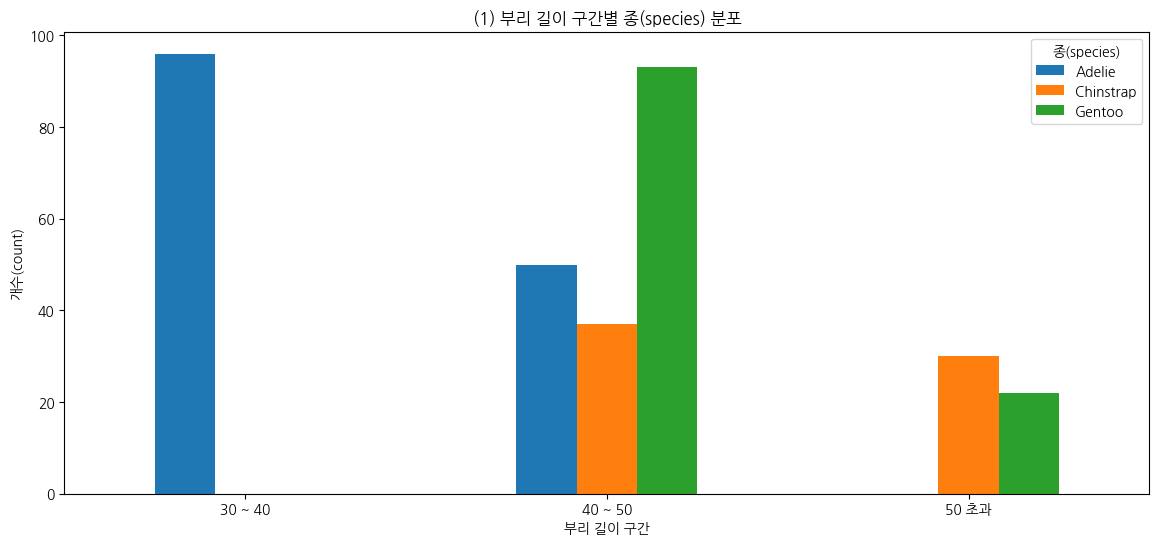

In [30]:
# bill_length를 index, species를 columns, Count를 값으로 pivot
wide = dataDF1.reset_index().pivot(index='bill_length', columns='species', values='Count').fillna(0)

# 그래프 그리기
wide.plot.bar(figsize=(14, 6))
plt.title('(1) 부리 길이 구간별 종(species) 분포')

plt.xlabel('부리 길이 구간')
plt.ylabel('개수(count)')

plt.xticks(rotation=0)

plt.legend(title='종(species)')

plt.show()

### (1) 종(species)에 따른 부리 길이 

### (2) 종(species)에 따른 부리 깊이(mm) 

- 전처리 수행 <hr>

In [31]:
# ------------------------------------------------------------------------------------------------------------------
# 사용하지 않는 컬럼 삭제
# print(dataDF.columns)
dataDF2 = dataDF.loc[:, ['species', 'bill_depth_mm']]
display(dataDF2)

# ------------------------------------------------------------------------------------------------------------------
# # 크기별 범위 설정 함수
# def bill_length(data):
#     data = float(data)
#     if 30 <= data < 40:
#         return '30 ~ 40'
#     elif 40 <= data < 50:
#         return '40 ~ 50'
#     elif data < 30:
#         return '30 미만'
#     elif data > 50:
#         return '50 초과'
# # ------------------------------------------------------------------------------------------------------------------
# dataDF['bill_length'] = dataDF['bill_length_mm'].apply(bill_length)
# display(dataDF)
# # ------------------------------------------------------------------------------------------------------------------

dataDF2 = dataDF2.groupby(by=['species', 'bill_depth_mm'], observed=True)['bill_depth_mm'].size().reset_index(name='Count')
display(dataDF)

dataDF2 = dataDF2.set_index(['species', 'bill_depth_mm'])
display(dataDF2)


,species,bill_depth_mm
0,Adelie,18.7
1,Adelie,17.4
2,Adelie,18.0
3,Adelie,19.3
4,Adelie,20.6
...,...,...
328,Chinstrap,19.8
329,Chinstrap,18.1
330,Chinstrap,18.2
331,Chinstrap,19.0


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Count
species bill_depth_mm       
Adelie  15.5               1
        15.9               1
        16.0               1
        16.1               2
        16.2               1
...                      ...
Gentoo  16.5               1
        16.8               1
        17.0               3
        17.1               1
        17.3               2

[120 rows x 1 columns]